---
# <center>Clustering</center>
---

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
np.random.seed(1234)

In [12]:
def myscatter(data,assignment):
    sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)', 
                hue=assignment, 
                palette=sns.color_palette('Set1', as_cmap=True))

# Load the data

In [13]:
data = pd.read_csv('mall/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data = data.set_index('CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [15]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

# K-means

In [16]:
kmeans = cluster.KMeans( n_clusters=5, init='random', verbose=1).fit(X)

Initialization complete
Iteration 0, inertia 144871.0
Iteration 1, inertia 80375.90847404214
Iteration 2, inertia 70976.03219050677
Iteration 3, inertia 61414.50591751557
Iteration 4, inertia 51373.39618485099
Iteration 5, inertia 44494.88894216515
Iteration 6, inertia 44448.45544793369
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 168834.0
Iteration 1, inertia 103574.95532947787
Iteration 2, inertia 66323.08768622634
Iteration 3, inertia 47574.6768035804
Iteration 4, inertia 44767.75381944784
Iteration 5, inertia 44474.83570937371
Iteration 6, inertia 44448.45544793369
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 228500.0
Iteration 1, inertia 111869.56757386393
Iteration 2, inertia 96044.8127479635
Iteration 3, inertia 83285.24148347788
Iteration 4, inertia 79671.81054556693
Iteration 5, inertia 77977.29592192236
Iteration 6, inertia 77348.62232844056
Iteration 7, inertia 76945.3822282133
Iterat

In [17]:
kmeans.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4,
       3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

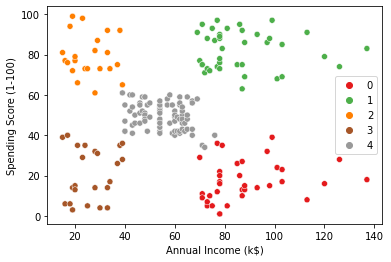

In [18]:
myscatter(data, kmeans.labels_)

# Improved initialization: kmeans++

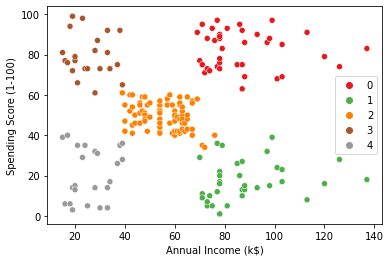

In [19]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++').fit(X)
myscatter(data, kmeans.labels_)

# DBSCAN:
## Density-Based Spatial Clustering of Applications with Noise


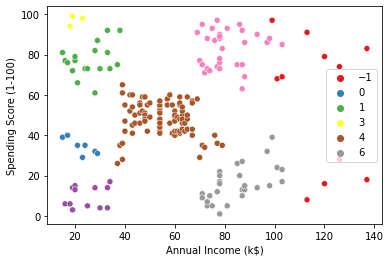

In [29]:
dbscan = cluster.DBSCAN(eps=9, min_samples=3).fit(X)
myscatter(data, dbscan.labels_)

# Prediction

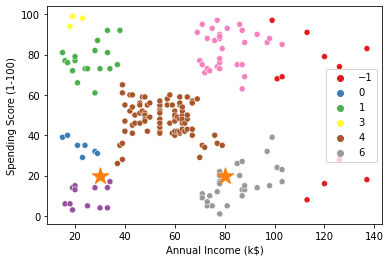

In [30]:
Xnew = np.array([[30,20],[80,20]])
myscatter(data, kmeans.labels_)
plt.scatter(Xnew[:,0],Xnew[:,1],marker='*',s=300)

In [32]:
kmeans.predict(Xnew)

array([3, 4], dtype=int32)